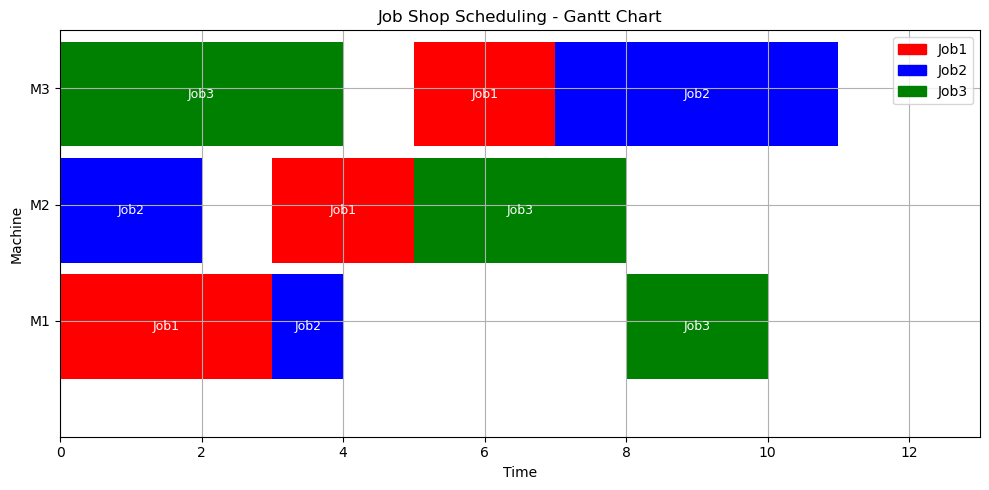

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Job data: list of operations per job [(machine, time)]
jobs = {
    "Job1": [(1, 3), (2, 2), (3, 2)],
    "Job2": [(2, 2), (1, 1), (3, 4)],
    "Job3": [(3, 4), (2, 3), (1, 2)]
}

# Initialize machine availability
num_machines = 3
machine_available = [0] * (num_machines + 1)  # index 1-based

# Track job progress
schedule = []
job_ready = {job: 0 for job in jobs}  # operation index
job_end_time = {job: 0 for job in jobs}

# Schedule each operation in order
while any(job_ready[job] < len(jobs[job]) for job in jobs):
    for job in jobs:
        idx = job_ready[job]
        if idx < len(jobs[job]):
            machine, duration = jobs[job][idx]
            ready_time = max(machine_available[machine], job_end_time[job])
            schedule.append((job, machine, ready_time, duration))
            machine_available[machine] = ready_time + duration
            job_end_time[job] = ready_time + duration
            job_ready[job] += 1

# 🎨 Gantt Chart Visualization
colors = {"Job1": "red", "Job2": "blue", "Job3": "green"}
fig, ax = plt.subplots(figsize=(10, 5))

for job, machine, start, duration in schedule:
    ax.broken_barh([(start, duration)], (machine * 10, 9), facecolors=colors[job])
    ax.text(start + duration/2, machine * 10 + 4.5, job, ha='center', va='center', color='white', fontsize=9)

# Axis settings
ax.set_ylim(5, (num_machines + 1) * 10)
ax.set_xlim(0, max(end for _, _, end, dur in schedule) + 5)
ax.set_xlabel("Time")
ax.set_ylabel("Machine")
ax.set_yticks([10 * m + 5 for m in range(1, num_machines + 1)])
ax.set_yticklabels([f"M{m}" for m in range(1, num_machines + 1)])
ax.set_title("Job Shop Scheduling - Gantt Chart")

# Legend
patches = [mpatches.Patch(color=color, label=job) for job, color in colors.items()]
ax.legend(handles=patches)

plt.grid(True)
plt.tight_layout()
plt.show()
